In [7]:
import pandas as pd  

# Load the Excel file (update the file path)
file_path = r"C:\Users\User\Documents\ML_Data.xlsx"  # Update with actual path
df = pd.read_excel(file_path)

# Display dataset info
print("Dataset Info:")
print(df.info())

# Show the first few rows
print("\nFirst 5 Rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Background characteristic                  50 non-null     object 
 1   Has at least one developmental difficulty  44 non-null     object 
 2   Difficulty in seeing                       44 non-null     object 
 3   Difficulty in hearing                      44 non-null     object 
 4   Can't understand words                     44 non-null     object 
 5   Difficulty in understanding the child      44 non-null     object 
 6   Late in standing up and walking            44 non-null     object 
 7   Child's speech not clear                   44 non-null     object 
 8   Difficulty in walking/moving hands         44 non-null     object 
 9   Suffers from convulsions                   44 non-null     object 
 10  Fits like othe

In [8]:
# Step 1: Drop any empty rows if necessary
df = df.dropna(how='all')  

# Step 2: Rename columns to remove spaces and make them easier to work with
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Step 3: Convert numerical columns from object to float (if needed)
num_cols = df.columns[1:]  # All except the first column
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

# Step 4: Check if missing values exist
print("\nMissing Values:")
print(df.isnull().sum())

# Step 5: Display cleaned dataset
print("\nCleaned Dataset Preview:")
print(df.head())



Missing Values:
background_characteristic                    0
has_at_least_one_developmental_difficulty    7
difficulty_in_seeing                         7
difficulty_in_hearing                        7
can't_understand_words                       7
difficulty_in_understanding_the_child        7
late_in_standing_up_and_walking              7
child's_speech_not_clear                     7
difficulty_in_walking/moving_hands           7
suffers_from_convulsions                     7
fits_like_other_slowness                     7
shows_signs_of_mental_underdevelopment       7
number_of_children                           6
dtype: int64

Cleaned Dataset Preview:
  background_characteristic  has_at_least_one_developmental_difficulty  \
0                       Age                                        NaN   
1                         2                                       25.3   
2                         3                                       22.9   
3                         4          

In [9]:
# Step 1: Fill missing values in numerical columns with their column mean
df.fillna(df.mean(), inplace=True)

# Step 2: Check if missing values are now removed
print("\nMissing Values After Filling:")
print(df.isnull().sum())

# Step 3: Display final cleaned dataset
print("\nFinal Cleaned Dataset Preview:")
print(df.head())


TypeError: can only concatenate str (not "int") to str

In [10]:
# Convert all columns (except 'background_characteristic') to numeric
num_cols = df.columns[1:]  # Exclude first column (text-based)
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

# Check data types to confirm conversion
print("\nUpdated Data Types:")
print(df.dtypes)



Updated Data Types:
background_characteristic                     object
has_at_least_one_developmental_difficulty    float64
difficulty_in_seeing                         float64
difficulty_in_hearing                        float64
can't_understand_words                       float64
difficulty_in_understanding_the_child        float64
late_in_standing_up_and_walking              float64
child's_speech_not_clear                     float64
difficulty_in_walking/moving_hands           float64
suffers_from_convulsions                     float64
fits_like_other_slowness                     float64
shows_signs_of_mental_underdevelopment       float64
number_of_children                           float64
dtype: object


In [11]:
# Fill missing values in numerical columns with their column mean
df.fillna(df.mean(), inplace=True)

# Verify missing values are gone
print("\nMissing Values After Filling:")
print(df.isnull().sum())

# Display cleaned dataset
print("\nFinal Cleaned Dataset Preview:")
print(df.head())


TypeError: can only concatenate str (not "int") to str

In [12]:
# Convert all columns (except 'background_characteristic') to numeric, forcing errors to NaN
num_cols = df.columns[1:]  # Exclude first column
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

# Verify data types
print("\nUpdated Data Types:")
print(df.dtypes)



Updated Data Types:
background_characteristic                     object
has_at_least_one_developmental_difficulty    float64
difficulty_in_seeing                         float64
difficulty_in_hearing                        float64
can't_understand_words                       float64
difficulty_in_understanding_the_child        float64
late_in_standing_up_and_walking              float64
child's_speech_not_clear                     float64
difficulty_in_walking/moving_hands           float64
suffers_from_convulsions                     float64
fits_like_other_slowness                     float64
shows_signs_of_mental_underdevelopment       float64
number_of_children                           float64
dtype: object


In [13]:
# Fill missing values in numerical columns with column mean
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.mean()))

# Verify missing values are gone
print("\nMissing Values After Filling:")
print(df.isnull().sum())

# Display final cleaned dataset
print("\nFinal Cleaned Dataset Preview:")
print(df.head())



Missing Values After Filling:
background_characteristic                    0
has_at_least_one_developmental_difficulty    0
difficulty_in_seeing                         0
difficulty_in_hearing                        0
can't_understand_words                       0
difficulty_in_understanding_the_child        0
late_in_standing_up_and_walking              0
child's_speech_not_clear                     0
difficulty_in_walking/moving_hands           0
suffers_from_convulsions                     0
fits_like_other_slowness                     0
shows_signs_of_mental_underdevelopment       0
number_of_children                           0
dtype: int64

Final Cleaned Dataset Preview:
  background_characteristic  has_at_least_one_developmental_difficulty  \
0                       Age                                  23.706977   
1                         2                                  25.300000   
2                         3                                  22.900000   
3                

In [14]:
# Convert the target variable to binary (1 = Has difficulty, 0 = No difficulty)
df["has_at_least_one_developmental_difficulty"] = df["has_at_least_one_developmental_difficulty"].apply(lambda x: 1 if x > 0 else 0)

# Confirm the changes
print(df["has_at_least_one_developmental_difficulty"].value_counts())


has_at_least_one_developmental_difficulty
1    50
Name: count, dtype: int64


In [15]:
# Check unique values before converting
print("Unique values in target column (before conversion):")
print(df["has_at_least_one_developmental_difficulty"].unique())


Unique values in target column (before conversion):
[1]


In [16]:
# Check the first few rows to see numerical columns that indicate severity
print(df.head())


  background_characteristic  has_at_least_one_developmental_difficulty  \
0                       Age                                          1   
1                         2                                          1   
2                         3                                          1   
3                         4                                          1   
4                         5                                          1   

   difficulty_in_seeing  difficulty_in_hearing  can't_understand_words  \
0              0.704651               2.148837                 5.85814   
1              0.600000               1.500000                 6.20000   
2              0.500000               1.500000                 6.00000   
3              0.700000               2.100000                 5.80000   
4              0.700000               2.100000                 5.80000   

   difficulty_in_understanding_the_child  late_in_standing_up_and_walking  \
0                               1

In [17]:
from sklearn.model_selection import train_test_split

# Define target variable (severity score)
y = df["shows_signs_of_mental_underdevelopment"]

# Define feature variables (all other numerical columns except target)
X = df.drop(columns=["shows_signs_of_mental_underdevelopment", "background_characteristic"])  

# Split into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check dataset shapes
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (40, 11)
Test set size: (10, 11)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Initialize the model
model = LinearRegression()

# Step 2: Train the model
model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 4: Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Model Performance:
Mean Absolute Error (MAE): 0.7889370526336467
Mean Squared Error (MSE): 1.5917874982734057
R² Score: 0.6407830113609813


In [19]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 2: Train the model
rf_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_rf = rf_model.predict(X_test)

# Step 4: Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display results
print(f"Random Forest Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R² Score: {r2_rf}")


Random Forest Model Performance:
Mean Absolute Error (MAE): 1.2300046511627911
Mean Squared Error (MSE): 3.02430756906436
R² Score: 0.3175077333778046


In [20]:
from sklearn.preprocessing import StandardScaler

# Step 1: Initialize the scaler
scaler = StandardScaler()

# Step 2: Fit and transform X_train, transform X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Retrain the Random Forest model
rf_model_scaled = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_scaled.fit(X_train_scaled, y_train)

# Step 4: Make predictions
y_pred_rf_scaled = rf_model_scaled.predict(X_test_scaled)

# Step 5: Evaluate the model again
mae_rf_scaled = mean_absolute_error(y_test, y_pred_rf_scaled)
mse_rf_scaled = mean_squared_error(y_test, y_pred_rf_scaled)
r2_rf_scaled = r2_score(y_test, y_pred_rf_scaled)

# Display results
print(f"Random Forest Model with Feature Scaling Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf_scaled}")
print(f"Mean Squared Error (MSE): {mse_rf_scaled}")
print(f"R² Score: {r2_rf_scaled}")


Random Forest Model with Feature Scaling Performance:
Mean Absolute Error (MAE): 1.2250465116279075
Mean Squared Error (MSE): 2.9992366322336403
R² Score: 0.32316546497857346


In [21]:
from xgboost import XGBRegressor

# Step 1: Initialize the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Step 2: Train the model
xgb_model.fit(X_train_scaled, y_train)

# Step 3: Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Step 4: Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Display results
print(f"XGBoost Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"R² Score: {r2_xgb}")


ModuleNotFoundError: No module named 'xgboost'

In [22]:
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 1.8/124.9 MB 10.1 MB/s eta 0:00:13
   - -------------------------------------- 3.7/124.9 MB 9.1 MB/s eta 0:00:14
   - -------------------------------------- 5.8/124.9 MB 9.3 MB/s eta 0:00:13
   -- ------------------------------------- 7.6/124.9 MB 9.2 MB/s eta 0:00:13
   --- ------------------------------------ 9.7/124.9 MB 9.3 MB/s eta 0:00:13
   --- ------------------------------------ 11.5/124.9 MB 9.2 MB/s eta 0:00:13
   ---- ----------------------------------- 13.4/124.9 MB 9.2 MB/s eta 0:00:13
   ----- ---------------------------------- 16.0/124.9 MB 9.2 MB/s eta 0:00:12
   ----- ---------------------------------- 18.1/124.9 MB 9.2 MB/s eta 0:00:12
   ------ --------------------------------- 19.9/124.9 MB 9.3 MB/s eta 0:00:12
   ------ --------------------------------- 21.8/124.9 MB 9.2 MB/s eta 0:00:12
   ------- -------------------------------- 23.6/124.9 MB 9.2 MB

In [23]:
from xgboost import XGBRegressor

# Step 1: Initialize the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Step 2: Train the model
xgb_model.fit(X_train_scaled, y_train)

# Step 3: Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Step 4: Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Display results
print(f"XGBoost Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"R² Score: {r2_xgb}")


XGBoost Model Performance:
Mean Absolute Error (MAE): 1.503878252894379
Mean Squared Error (MSE): 3.997235999704813
R² Score: 0.09794801111899776


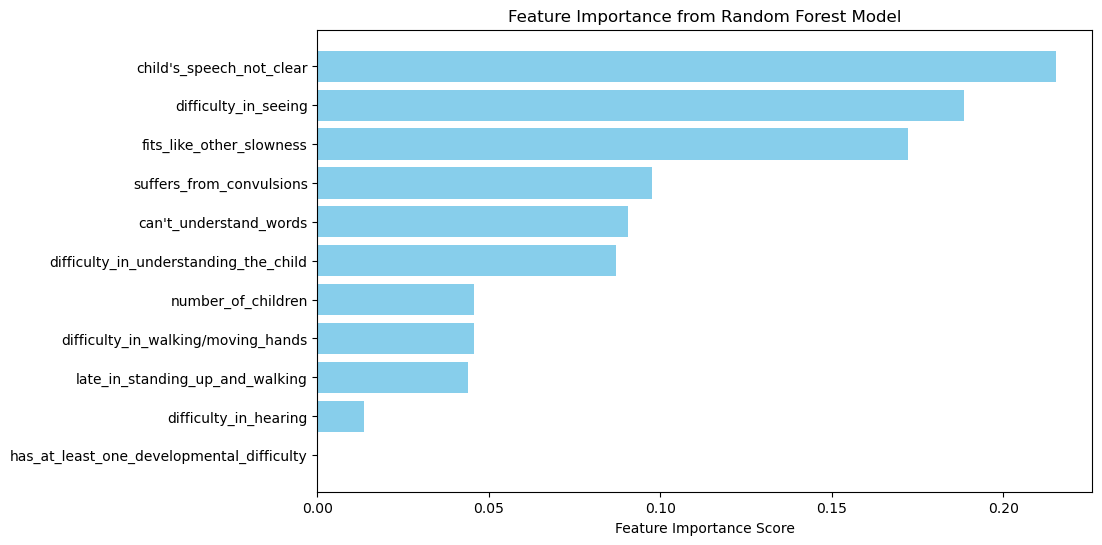

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from Random Forest
feature_importance = rf_model_scaled.feature_importances_

# Sort and plot feature importance
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 6))
plt.barh(np.array(X_train.columns)[sorted_idx], feature_importance[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance from Random Forest Model")
plt.show()


In [25]:
# Print feature importance values
feature_importance_dict = dict(zip(X_train.columns, rf_model_scaled.feature_importances_))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature importance scores
print("\nFeature Importance Scores:")
for feature, score in sorted_features:
    print(f"{feature}: {score:.4f}")



Feature Importance Scores:
child's_speech_not_clear: 0.2153
difficulty_in_seeing: 0.1885
fits_like_other_slowness: 0.1722
suffers_from_convulsions: 0.0977
can't_understand_words: 0.0905
difficulty_in_understanding_the_child: 0.0872
number_of_children: 0.0456
difficulty_in_walking/moving_hands: 0.0455
late_in_standing_up_and_walking: 0.0439
difficulty_in_hearing: 0.0136
has_at_least_one_developmental_difficulty: 0.0000


In [26]:
# Drop the least important features
X_train_refined = X_train.drop(columns=["difficulty_in_hearing", "has_at_least_one_developmental_difficulty"])
X_test_refined = X_test.drop(columns=["difficulty_in_hearing", "has_at_least_one_developmental_difficulty"])

# Retrain the Random Forest model with refined features
rf_model_refined = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_refined.fit(X_train_refined, y_train)

# Make predictions
y_pred_rf_refined = rf_model_refined.predict(X_test_refined)

# Evaluate performance
mae_rf_refined = mean_absolute_error(y_test, y_pred_rf_refined)
mse_rf_refined = mean_squared_error(y_test, y_pred_rf_refined)
r2_rf_refined = r2_score(y_test, y_pred_rf_refined)

# Display new results
print(f"Refined Random Forest Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf_refined}")
print(f"Mean Squared Error (MSE): {mse_rf_refined}")
print(f"R² Score: {r2_rf_refined}")


Refined Random Forest Model Performance:
Mean Absolute Error (MAE): 1.2527418604651166
Mean Squared Error (MSE): 3.064696633585722
R² Score: 0.30839317622300355


In [27]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples in leaf node
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Run Grid Search to find the best parameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_refined, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("\nBest Hyperparameters:", best_params)

# Train a new Random Forest model with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train_refined, y_train)

# Make predictions
y_pred_best_rf = best_rf.predict(X_test_refined)

# Evaluate performance
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Display new results
print(f"\nOptimized Random Forest Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_best_rf}")
print(f"Mean Squared Error (MSE): {mse_best_rf}")
print(f"R² Score: {r2_best_rf}")



Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Optimized Random Forest Model Performance:
Mean Absolute Error (MAE): 1.2919506986910332
Mean Squared Error (MSE): 3.333583765712676
R² Score: 0.24771370362305223


In [28]:
import joblib

# Save the trained model
joblib.dump(best_rf, "neurodevelopmental_severity_model.pkl")

# Save feature importance as a CSV file
feature_importance_df = pd.DataFrame(sorted_features, columns=["Feature", "Importance"])
feature_importance_df.to_csv("feature_importance.csv", index=False)

print("Model and feature importance saved successfully!")


Model and feature importance saved successfully!


In [29]:
import os

# Print the current working directory (where files were saved)
print("Current Jupyter Save Location:", os.getcwd())

# List all files in the directory
print("\nFiles in This Directory:")
print(os.listdir(os.getcwd()))


Current Jupyter Save Location: C:\Users\User

Files in This Directory:
['.ai-navigator', '.anaconda', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.ms-ad', 'anaconda3', 'anaconda_projects', 'AppData', 'Application Data', 'archive (1).zip', 'archive (2).zip', 'Contacts', 'Cookies', 'dengue_2021.csv', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'feature_importance.csv', 'First Draft.ipynb', 'health-equity-monitor-indicators-for-sri-lanka-48.csv', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'Music', 'My Documents', 'NetHood', 'neurodevelopmental_severity_model.pkl', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TM.blf', 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'Pictures', 'PrintHood', 'Recent',